In [1]:
import warnings
warnings.filterwarnings("ignore")

# Dimensionlity Reduction
###### 注意事项:降维会有信息损失，即使它可以提高你的训练效率，但是对于你系统的性能仍然会有细小的变坏。而且它还会使你的 pipline 变得负责且不可维护。因此首先应该考虑使用原始数据进行训练除非训练过程实在太慢了再考虑降维。

### 纬度诅咒

### 降维的主要方法
###### Projection and Manifold Learning
#### Project:
在真实世界中，训练样本的不会均匀的散布到所有纬度上。许多纬度是稳定的，而一些纬度有比较高的相关性，因此训练样本依赖于一个较低纬度的子集中。
<br/>
<img src=".\pic\3D-lie-in-2D.png" width="300" height="150" style="float:left"/>
<img src=".\pic\new-2D-after-projection.png" width=300 height=150 style="float:left"/>
######
###### 但是它并不一定总是有效的，如：
<img src=".\pic\swiss-roll.png" style="float:left;height:300px; width:300px"/>
<img src=".\pic\squashing-by-projection-onto-a-plane-versus-unrolling-the-swiss-roll.png" style="float:right;height:300px; width:300px"/>


###### 左边是原图；右边（左）是挤压的映射图，右边（右）是展开的映射图

#### Manifold Learning

#### PCA:定义一个接近数据集的超平面，让数据在这个平面上映射
###### 保留方差（最大）
principal components:PCA确定了训练集映射后方差最大的轴为主要成分
寻找主要成分的方法SVD(Singular Value Decomposition):它可以将训练集合 X 分解位 $U*Σ*V^T$，$V^T = (c1 c2 ... c_n)$
注意点:中心化

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
angles

array([ 4.05702076,  2.07877122,  4.08366706,  2.86849101,  2.78796962,
        0.51829776,  4.10058498, -0.47064061,  0.6921513 ,  1.54890683,
        3.17275549,  0.43156897,  3.56675981,  4.13416651,  0.27208837,
        2.31486989, -0.45765401,  1.32167425, -0.29190063,  4.0081209 ,
        1.55529265,  3.9719502 ,  3.20537966,  3.58229214,  0.31602282,
       -0.1468131 ,  2.33093338,  0.29155027,  2.95597262,  1.42474635,
        1.98771172,  3.918202  ,  1.95843506,  0.00984931,  0.24561024,
        2.06920697,  1.97119601,  2.50466749,  1.3920027 ,  2.56213444,
        1.3703472 ,  2.44013542,  3.11631071,  0.34339468,  1.26985911,
        1.86813125,  2.73584238,  0.69543718,  2.11415473,  2.44491722,
        3.71994983,  1.20990725,  2.50441693,  0.40216992,  1.8457995 ,
        0.35975371,  3.82777811,  1.53491357,  3.41216926,  1.46401207])

In [4]:
X_centered = X - X.mean(axis=0)
U,s,V = np.linalg.svd(X_centered)
c1 = V.T[:,0]
c2 = V.T[:,1]

In [5]:
V

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ],
       [-0.08626012, -0.31420255,  0.94542898]])

In [6]:
c2

array([-0.34027485,  0.90119108,  0.2684542 ])

###### 映射到D纬度

In [7]:
W2 = V.T[:,:2]
X2D = X_centered.dot(W2)

In [8]:
## sklearn PCA自己完成中心化操作
from sklearn.decomposition import PCA
## n_components设置整数的时候表示纬度，设置0.0-1.0之间保证方差率
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
##主成分
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [10]:
##误差率，用来解释误差和对应轴的依赖关系
pca.explained_variance_ratio_

array([ 0.84248607,  0.14631839])

In [11]:
## 纬度数的选择，通常情况下会选择方差加起来占比比较大的数（如：95%），除非是可视化要降维到2到3纬度
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([ 0.84248607,  0.98880446])

In [12]:
#取出a中元素最大值所对应的索引
d = np.argmax(cumsum>=0.95) + 1

In [13]:
d

2

In [14]:
np.argmax(np.array([6,1,2,3,4,5]))

0

#### MNIST Compression

In [17]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST Original',data_home='/Users/zhen.huaz/work/github/datesets')

/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/zhen.huaz/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [34]:
pca = PCA(n_components=154)
X_mnist = mnist.data
X_mnist_reduced = pca.fit_transform(X_mnist)
X_mnist_recovered = pca.inverse_transform(X_mnist_reduced)

In [35]:
X_mnist_reduced

array([[  1.01049400e+03,  -2.89963621e+02,   5.76120745e+02, ...,
          1.15630840e+01,  -4.99016332e+01,  -8.30048337e+00],
       [  1.03356077e+03,  -3.51183693e+02,   4.98395741e+02, ...,
          1.05625691e+01,  -4.72327108e+01,   4.13115357e+01],
       [  6.15426579e+02,  -2.44220296e+02,   6.29110042e+02, ...,
          9.13906264e+01,  -6.03348470e+01,   3.03320889e+01],
       ..., 
       [ -1.34302686e+02,   7.59461278e+02,   3.08909969e+02, ...,
          5.06264410e+01,  -9.85501443e-01,   5.56688698e+01],
       [  1.32155149e+01,   8.70405945e+02,   5.79580290e+02, ...,
          3.76458271e+01,   2.46496689e+00,  -4.64612954e+01],
       [  3.41049175e+02,   9.59320770e+02,   3.55680641e+02, ...,
         -7.12422584e+00,   4.36206693e+01,   1.25106374e+01]])

In [36]:
import matplotlib
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

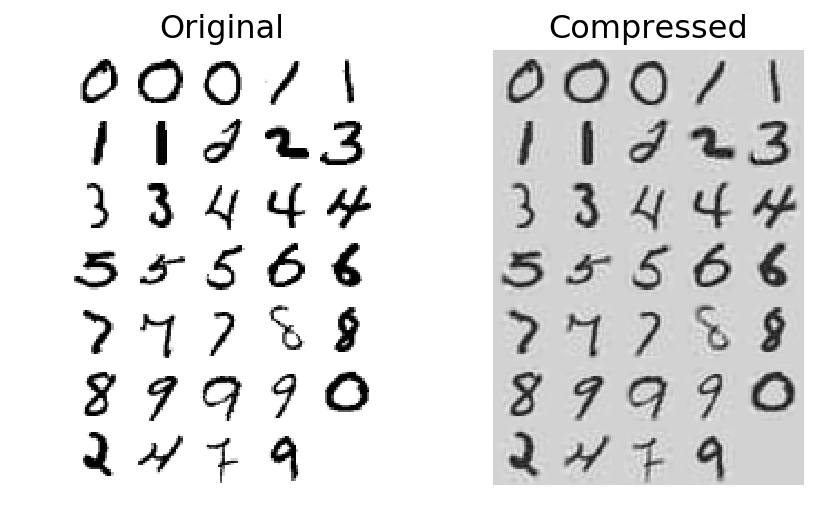

In [37]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_mnist_recovered[::2100])
plt.title("Compressed", fontsize=16)

#save_fig("mnist_compression_plot")

#### Incremental PCA
###### PCA的问题是需要全量训练集载入到内容，再进行svd计算。IPCA可以把训练集合切成mini-batch喂入IPCA算法中，因此可以用作在线PCA

In [47]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_mnist,n_batches):
    # 注意增量学习使用partial_fit
    inc_pca.partial_fit(X_batch)

In [48]:
X_mnist_inc_reduced = inc_pca.transform(X_mnist)

In [49]:
X_mnist_inc_recovered = inc_pca.inverse_transform(X_mnist_reduced)

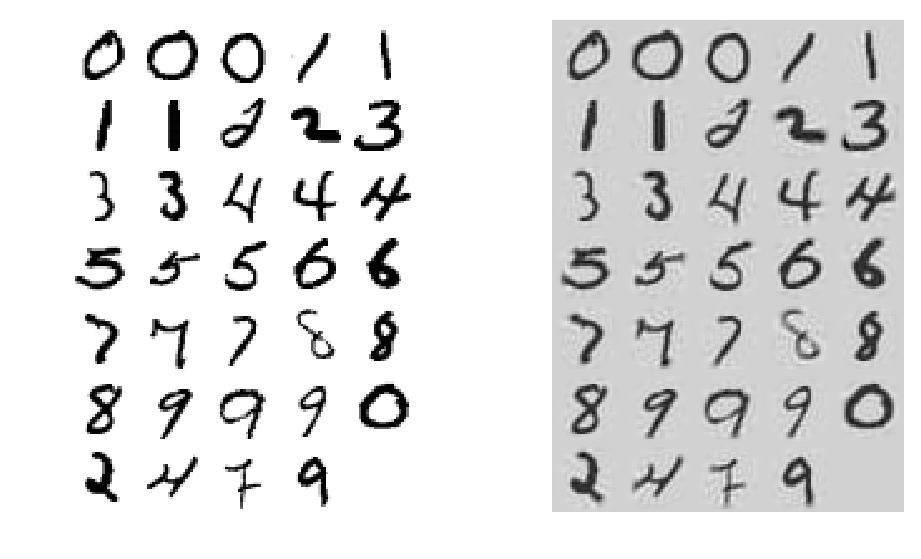

In [50]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_mnist[::2100])
plt.subplot(122)
plot_digits(X_mnist_inc_recovered[::2100])
plt.tight_layout()

###### Using memmap()
Let's create the memmap() structure and copy the MNIST data into it. This would typically be done by a first program:

In [51]:
filename = "my_mnist.data"
m, n = X_mnist.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_mnist

Now deleting the `memmap()` object will trigger its Python finalizer, which ensures that the data is saved to disk.

In [52]:
del X_mm

Next, another program would load the data and use it for training:

In [53]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=700, copy=True, n_components=154, whiten=False)

Randomized PCA 只计算最接近的d纬主成分，由$O(m*d^2) + O(d^3)$代替了$O(m*n^2) + O(n^3)$

In [55]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_rnd_reduced = rnd_pca.fit_transform(X_mnist)